$PEP: possibly delisted; no price data found  (1m 2024-08-15 00:00:00 -> 2024-08-22 00:00:00) (Yahoo error = "1m data not available for startTime=1723694400 and endTime=1724299200. The requested range must be within the last 30 days.")
$KO: possibly delisted; no price data found  (1m 2024-08-15 00:00:00 -> 2024-08-22 00:00:00) (Yahoo error = "1m data not available for startTime=1723694400 and endTime=1724299200. The requested range must be within the last 30 days.")


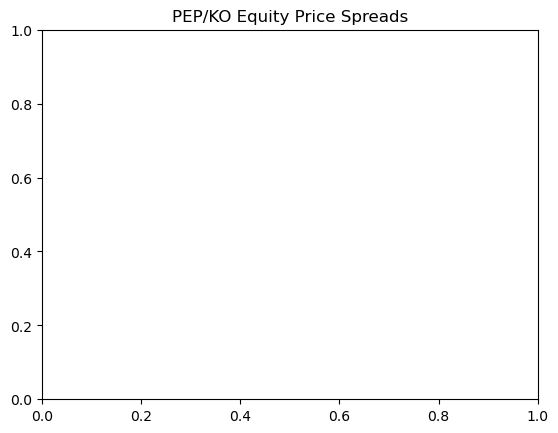

In [30]:
import yfinance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

pepsi = yfinance.Ticker("PEP")
cocacola = yfinance.Ticker("KO")

START=datetime(2024, 8, 15)
NUM_WEEKS = 1

spreads = []
current_week = START

for _ in range(NUM_WEEKS):
    end = current_week + timedelta(weeks=1)

    pepsi_history = pepsi.history(start=current_week, end=end, interval="1m")
    cocacola_history = cocacola.history(start=current_week, end=end, interval="1m")

    pepsi_close_data = pepsi_history["Close"]
    cocacola_close_data = cocacola_history["Close"]

    for i in range(len(pepsi_close_data)):
        pepsi_close = pepsi_close_data.iloc[i]
        cocacola_close = cocacola_close_data.iloc[i]
    
        spread = pepsi_close - cocacola_close
        spreads.append(spread)

    current = end

data = pd.DataFrame(spreads)

sns.lineplot(data=data).set(title='PEP/KO Equity Price Spreads')
plt.show()

In [31]:
import math

def calibrate_ou():
    # assuming long-term mean is the same
    # the short term mean of our sample
    mean = sum(spreads) / len(spreads)
    
    thetas = []
    for index, x in enumerate(spreads):
        if index == 0:
            continue

        prev_x = spreads[index - 1]
        
        theta = (-x + prev_x) / (math.e * (prev_x - mean))
        thetas.append(theta)

    return thetas


def log(n):
    abs_n = abs(n)
    if n < 0:
        return math.log(abs_n)
    elif n == 0:
        return 0
    
    return math.log(abs_n)


thetas = calibrate_ou()
d = list(map(lambda t: log(t), thetas))

data = pd.DataFrame(data=d)
sns.lineplot(data=data).set(title='OU Process Thetas')

plt.show()

ZeroDivisionError: division by zero